In [25]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier

In [26]:
df = pd.read_csv("./stroke.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

# **Data Preprocessing**

In [28]:
# Dropping Id columns
df.drop('id', axis='columns', inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [29]:
df.isnull().sum()   # Only the bmi columns contain 201 null values, so we have to replace null with avg values of bmi

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [30]:
# we have to replace null with avg values of bmi
df['bmi'].replace(np.nan, df['bmi'].mean(), inplace=True)
df.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_24740\2014715427.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].replace(np.nan, df['bmi'].mean(), inplace=True)


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [31]:
# Label Encoding
import pickle as pkl
label = LabelEncoder()
# Label Encoding with mappings preserved
# Create mappings for categorical data
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
mappings = {}

for col in categorical_columns:
    df[col] = label.fit_transform(df[col])
    mappings[col] = dict(zip(label.classes_, label.transform(label.classes_)))

# Save the mappings to use them in the app
with open('label_mappings.pkl', 'wb') as f:
    pkl.dump(mappings, f)


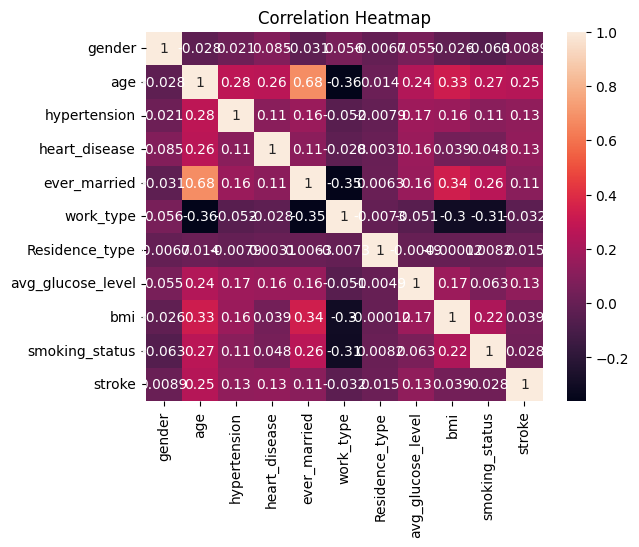

In [32]:
# Plotting the heatmap
corr_coeff = df.corr()
sn.heatmap(corr_coeff, annot=True)
plt.title("Correlation Heatmap")
plt.show()

# *Over Sampling with SMOTE*

In [33]:
x=df.drop('stroke', axis='columns')
y=df['stroke']
y=pd.DataFrame(y)
y.value_counts()    # As 0 is more then 1, we need Over Sampling to increase the accuricy

stroke
0         4861
1          249
Name: count, dtype: int64

In [34]:
smote = SMOTE(random_state=10)
x1,y1 = smote.fit_resample(x, y)
y1=pd.DataFrame(y1)
y1.value_counts()    # After Over Sampling 0 and 1 have same counts

stroke
0         4861
1         4861
Name: count, dtype: int64

# *Training the model*

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=10)

In [36]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred = model.predict(x_test)
# print("Accuracy = ", accuracy_score(y_test, y_pred))

In [38]:
# Confusion & Classifaction Metrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[886 112]
 [ 71 876]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       998
           1       0.89      0.93      0.91       947

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945



# *Exporting the model*

In [39]:
import pickle as pkl
with open('model_stroke.pkl', 'wb')as f:
    pkl.dump(model, f)